In [ ]:
import sympy as sp

V_m, R, T, a, b = sp.symbols('V_m R T a b')
P = sp.symbols('P')

# Peng-Robinson equation of state
P_eq = (R * T / (V_m - b)) - (a / (V_m * (V_m + b) + b * (V_m - b)))

integral = sp.integrate(P_eq, V_m)

integral_result = sp.simplify(integral)
integral_result




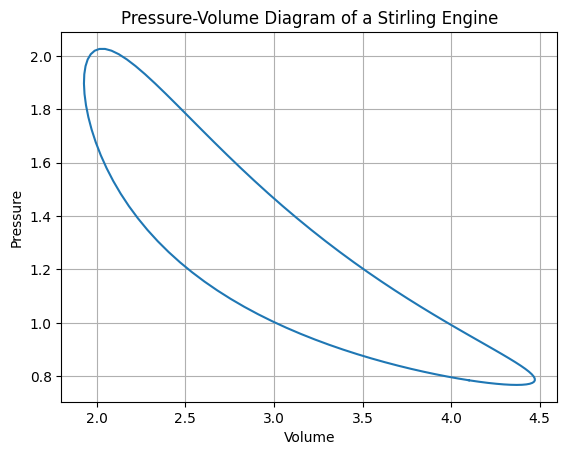

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
V_RESERVED = 0.1    # Reserved volume
V_SWEPT = 0.9       # Swept volume
V_K = 1             # Volume for isothermal processes (heater, cooler, regenerator)
V_R = 1
V_H = 1

# Isothermal Stirling engine efficiency (Carnot efficiency)
def carnot_efficiency(hot_temp: float, cold_temp: float) -> float:
    return 1.0 - cold_temp / hot_temp

# Assuming a simple sinusoidal volume change
def expansion_volume(theta: float) -> float:
    return V_RESERVED + V_SWEPT * np.sin(theta)

def compression_volume(theta: float) -> float:
    return V_RESERVED + V_SWEPT * np.cos(theta)

# Engine parameters
SPEED = 1.0
LOAD = 1.0
MASS = 1
PRESSURE = 10
ITER_COUNT = 0
MAX_ITER = 100

# Temperatures (K)
TEMP_HOT = 500          # Temperature of the hot source
TEMP_COLD = 200         # Temperature of the cold source
MASS_AIR = 0.00144      # Mass in kg 
GAS_CONSTANT = 8.314    # Universal gas constant (J/(mol·K))

# Intermediate temperatures
TEMP_COLD_COMP = TEMP_COLD
TEMP_EXP = TEMP_HOT
TEMP_REG = (TEMP_HOT - TEMP_COLD) / np.log(TEMP_HOT / TEMP_COLD)

# Crank angles and corresponding pressures and volumes
crank_angles = np.linspace(0, 2 * np.pi, 100)
pressures = np.zeros_like(crank_angles)
volumes = np.zeros_like(crank_angles)

# Calculate pressures and volumes at different crank angles
for i, alpha in enumerate(crank_angles):
    p = (MASS_AIR * GAS_CONSTANT) / (
        (compression_volume(alpha) / TEMP_COLD_COMP) + 
        (V_K / TEMP_COLD) + 
        (V_R / TEMP_REG) + 
        (V_H / TEMP_HOT) + 
        (expansion_volume(alpha) / TEMP_EXP)
    )
    volumes[i] = (compression_volume(alpha) + V_K + V_R + V_H + expansion_volume(alpha))
    pressures[i] = p

# Plot pressure vs. volume
plt.plot(volumes, pressures)
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Pressure-Volume Diagram of a Stirling Engine')
plt.grid(True)
plt.show()
